Epoch 1/10
31/31 [==============================] - 2s 35ms/step - loss: nan - accuracy: 0.0487 - val_loss: nan - val_accuracy: 0.0469
Epoch 2/10
31/31 [==============================] - 1s 33ms/step - loss: nan - accuracy: 0.0476 - val_loss: nan - val_accuracy: 0.0469
Epoch 3/10
31/31 [==============================] - 1s 43ms/step - loss: nan - accuracy: 0.0476 - val_loss: nan - val_accuracy: 0.0469
Epoch 4/10
31/31 [==============================] - 1s 43ms/step - loss: nan - accuracy: 0.0476 - val_loss: nan - val_accuracy: 0.0469
Epoch 5/10
31/31 [==============================] - 1s 29ms/step - loss: nan - accuracy: 0.0476 - val_loss: nan - val_accuracy: 0.0469
Epoch 6/10
31/31 [==============================] - 1s 29ms/step - loss: nan - accuracy: 0.0476 - val_loss: nan - val_accuracy: 0.0469
Epoch 7/10
31/31 [==============================] - 1s 29ms/step - loss: nan - accuracy: 0.0476 - val_loss: nan - val_accuracy: 0.0469
Epoch 8/10
31/31 [==============================] - 1s 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


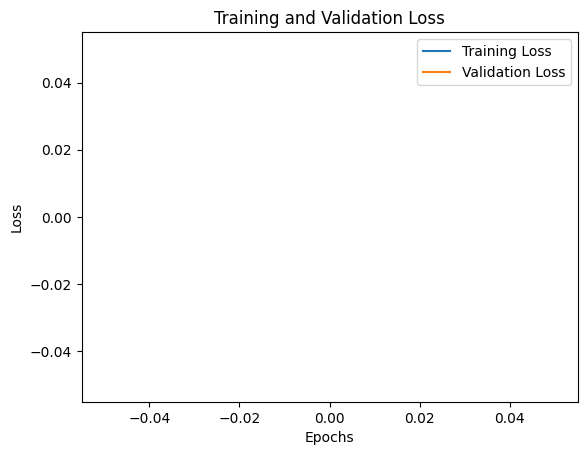

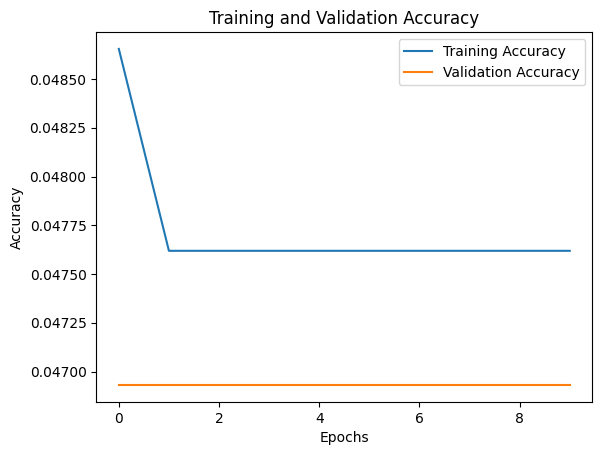

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

#Load the data
data = pd.read_csv('data.csv')
X = data.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
# Assuming your labels are in the range 1-24
# Map labels to a continuous range
mapping = {i: i if i < 9 else i - 1 for i in range(25)}
data.iloc[:, 0] = data.iloc[:, 0].map(mapping)

# One-hot encode labels
y = to_categorical(data.iloc[:, 0])  # one-hot encode labels
#Split the data
# Split the data into training and temporary data (70% training, 30% temporary)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=40)

# Split the temporary data into testing and validation data (33.33% testing, 66.67% validation)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.6667, random_state=40)
#Define the model with 0.2 dropout layer only
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(24, activation='softmax'))  # Change the number of neurons to 24

#Compile and train the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

#Test the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print the classification report
print(classification_report(y_true_classes, y_pred_classes))

#Plot the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


Epoch 1/10
31/31 [==============================] - 2s 32ms/step - loss: nan - accuracy: 0.0507 - val_loss: nan - val_accuracy: 0.0469
Epoch 2/10
31/31 [==============================] - 1s 29ms/step - loss: nan - accuracy: 0.0476 - val_loss: nan - val_accuracy: 0.0469
Epoch 3/10
31/31 [==============================] - 1s 27ms/step - loss: nan - accuracy: 0.0476 - val_loss: nan - val_accuracy: 0.0469
Epoch 4/10
31/31 [==============================] - 1s 30ms/step - loss: nan - accuracy: 0.0476 - val_loss: nan - val_accuracy: 0.0469
Epoch 5/10
31/31 [==============================] - 1s 26ms/step - loss: nan - accuracy: 0.0476 - val_loss: nan - val_accuracy: 0.0469
Epoch 6/10
31/31 [==============================] - 1s 27ms/step - loss: nan - accuracy: 0.0476 - val_loss: nan - val_accuracy: 0.0469
Epoch 7/10
31/31 [==============================] - 1s 28ms/step - loss: nan - accuracy: 0.0476 - val_loss: nan - val_accuracy: 0.0469
Epoch 8/10
31/31 [==============================] - 1s 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


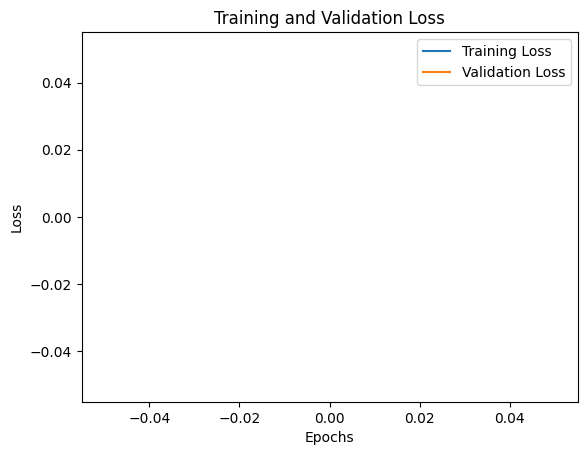

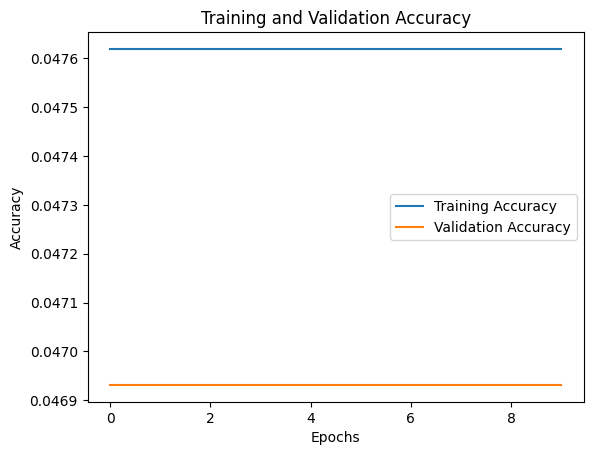

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dropout(0.3))
model.add(Dense(24, activation='softmax'))  # Change the number of neurons to 24

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
#Test the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print the classification report
print(classification_report(y_true_classes, y_pred_classes))

#Plot the model architecture
plot_model(model, to_file='model_architecture2.png', show_shapes=True, show_layer_names=True)

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


